In [14]:
%load_ext autoreload
%autoreload 2
%run ./initializer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Path (/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1) already exists in sys.path


In [15]:
from data_loading import DataLoader
from mood_RNN_classifier import MoodRNNPipeline
import torch


In [16]:
data_loader = DataLoader()
df = data_loader.load_and_transform_data("12h")

In [17]:
id_column = "id"
time_column = "truncated_time"
target_column = "mood"
feature_columns = list(set(df.columns) - {id_column, time_column, target_column})

df_processed = data_loader.add_features(df, id_column, time_column)

In [18]:
df_pd = df_processed.to_pandas()

In [19]:
# Initialize pipeline
pipeline = MoodRNNPipeline(id_column, time_column, target_column)

# Preprocess the data
features, target = pipeline.preprocess(df_pd, feature_columns)

# Split data by ID (training and validation split)
train_data = df_pd[df_pd[id_column].isin(df_pd[id_column].unique()[:int(0.8 * len(df[id_column].unique()))])]
val_data = df_pd[~df_pd[id_column].isin(train_data[id_column].unique())]

train_features, train_target = pipeline.preprocess(train_data, feature_columns)
val_features, val_target = pipeline.preprocess(val_data, feature_columns)

# Convert to PyTorch tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_features = torch.tensor(val_features, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)

# Create DataLoader for training and validation
batch_size = 32
train_loader = pipeline.create_dataloader(train_features, train_target, batch_size)
val_loader = pipeline.create_dataloader(val_features, val_target, batch_size)

# Train the model
pipeline.train(train_loader, val_loader, epochs=20)

Epoch 1/20, Train Loss: 42.172862006015464, Validation Loss: 42.0522964477539
Epoch 2/20, Train Loss: 31.94734351361384, Validation Loss: 29.815013122558593
Epoch 3/20, Train Loss: 19.069634265586977, Validation Loss: 16.206257629394532
Epoch 4/20, Train Loss: 8.348332240933278, Validation Loss: 6.65103546778361
Epoch 5/20, Train Loss: 2.742703425591109, Validation Loss: 2.432733345031738
Epoch 6/20, Train Loss: 0.979030254678648, Validation Loss: 1.1898533940315246
Epoch 7/20, Train Loss: 0.5805637953711338, Validation Loss: 0.8805425782998403
Epoch 8/20, Train Loss: 0.47735718472814953, Validation Loss: 0.7609639426072439
Epoch 9/20, Train Loss: 0.4482995452450924, Validation Loss: 0.7242073873678844
Epoch 10/20, Train Loss: 0.42256738734049876, Validation Loss: 0.7015386939048767
Epoch 11/20, Train Loss: 0.4099968483702081, Validation Loss: 0.7023224353790283
Epoch 12/20, Train Loss: 0.4056742970572143, Validation Loss: 0.680267870426178
Epoch 13/20, Train Loss: 0.39715458943554366,

Test Loss: 0.6558
RMSE: 0.8106
MAE: 0.6211
R²: 0.2149


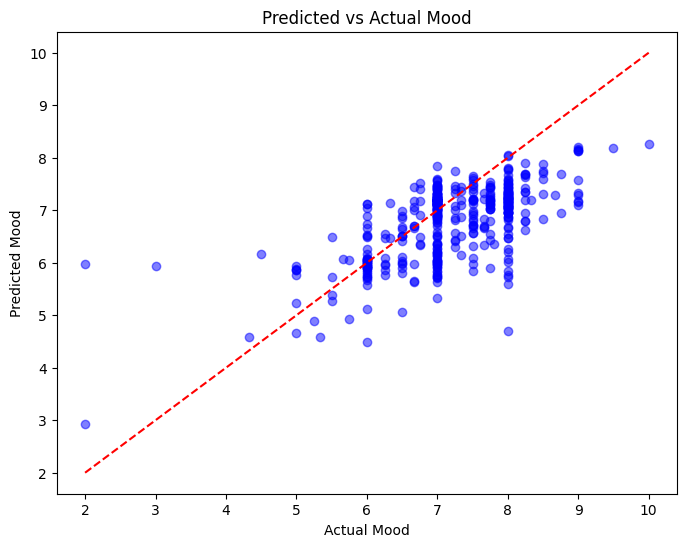

In [20]:
# Evaluate the model on the test set
pipeline.evaluate(val_loader)